<a href="https://colab.research.google.com/github/Nsarkar-XLR8/ML_Code/blob/main/OrdinalLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


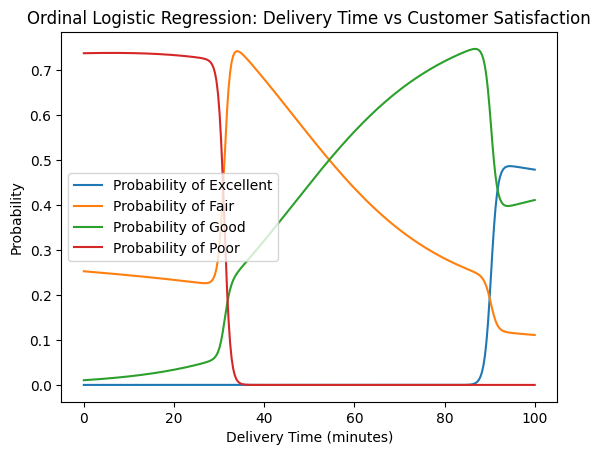

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Generate example data
np.random.seed(0)
delivery_time = np.random.uniform(0, 100, 200)  # Delivery time in minutes
satisfaction = pd.cut(delivery_time, bins=[0, 30, 60, 90, 120], labels=["Poor", "Fair", "Good", "Excellent"])

# Encode ordinal categories as numbers
encoder = LabelEncoder()
satisfaction_encoded = encoder.fit_transform(satisfaction)

# Fit an ordinal logistic regression model
model = LogisticRegression(multi_class='ovr', solver='lbfgs')
model.fit(delivery_time.reshape(-1, 1), satisfaction_encoded)

# Predict probabilities
x_range = np.linspace(0, 100, 300).reshape(-1, 1)
pred_probs = model.predict_proba(x_range)

# Plot the probabilities
categories = encoder.classes_
for i, category in enumerate(categories):
    plt.plot(x_range, pred_probs[:, i], label=f"Probability of {category}")

plt.title("Ordinal Logistic Regression: Delivery Time vs Customer Satisfaction")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Probability")
plt.legend()
plt.show()
